In [52]:
# -- Variables
RANDOM_STATE = 42

# -- Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# -- Import codes from the same directory
import os
cwd = os. getcwd()
%run "{cwd}\utils\plots.py"

# -- Load data
df_train_raw = pd.read_csv('data/train.csv', sep = ',')  
df_test_raw = pd.read_csv('data/test.csv', sep = ',')

# -4- Preparsing features
# -- male,female -> 0,1
def NormalizeGender(X):
    X_preparsed = X.copy(deep=True)
    X_preparsed.loc[
        X_preparsed['Sex']=='male',
        'Sex'
    ] = 0
    X_preparsed.loc[
        X_preparsed['Sex']=='female',
        'Sex'
    ] = 1
    X_preparsed['Sex'] = X_preparsed['Sex'].astype('bool')
    return X_preparsed
df_train_preparsed = NormalizeGender(df_train_raw)
df_test_preparsed = NormalizeGender(df_test_raw)

# -- Column used for counting
df_train_preparsed['Count'] = True; df_train_preparsed['Count'].astype('bool')
df_train_preparsed['Count'] = True; df_train_preparsed['Count'].astype('bool')

df_train_preparsed.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S,True


## Visualize correlations

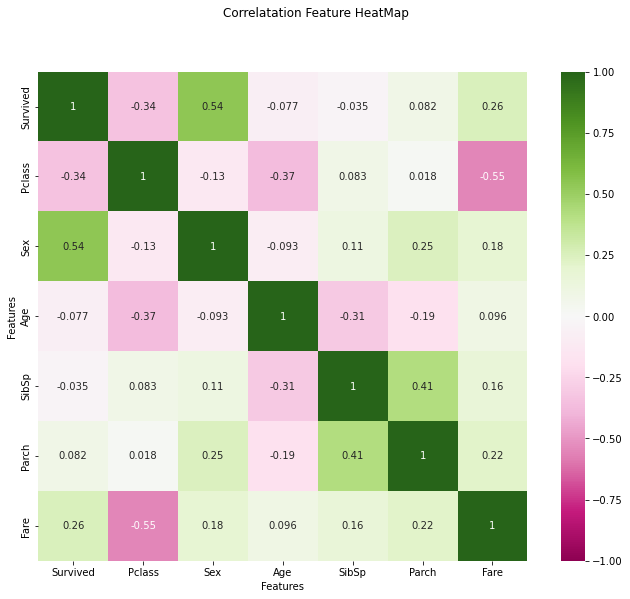

In [53]:
PlotFeaturesCorrelation( df_train_preparsed, drops=['PassengerId','Count'] )

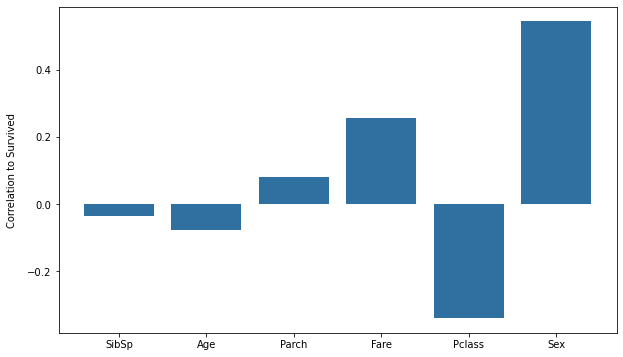

In [54]:
PlotCorrelationToResult( df_train_preparsed, 'Survived', drops=['PassengerId', 'Count'] )

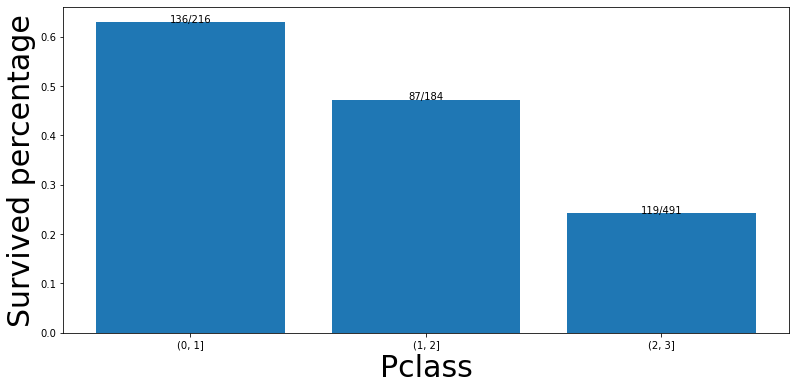

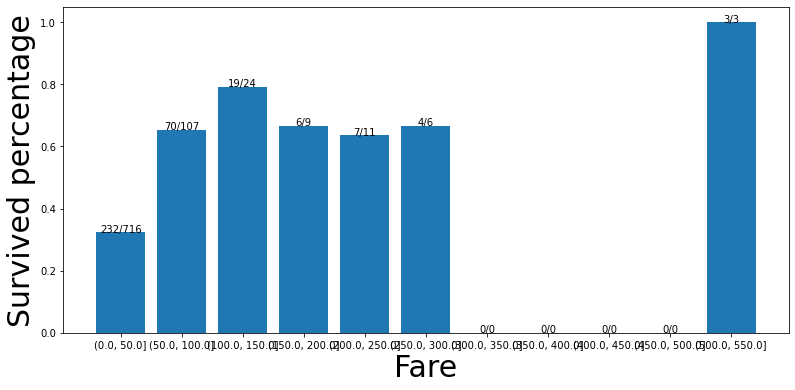

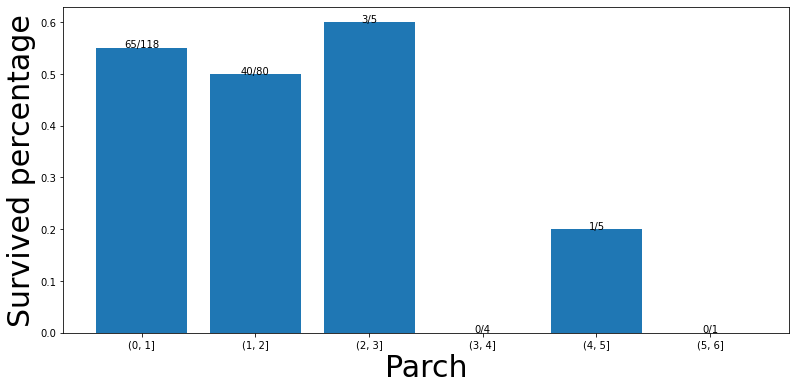

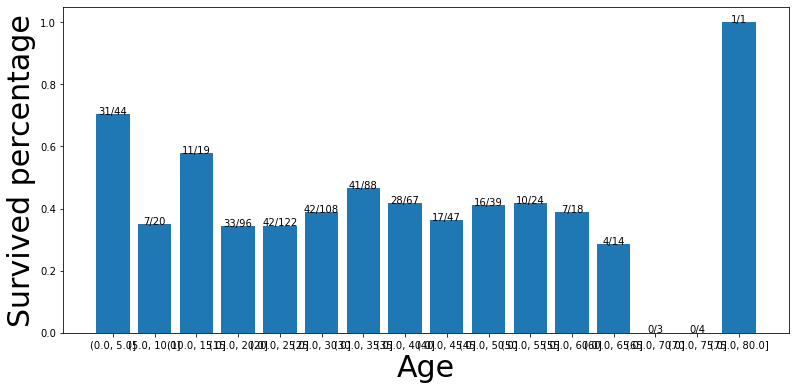

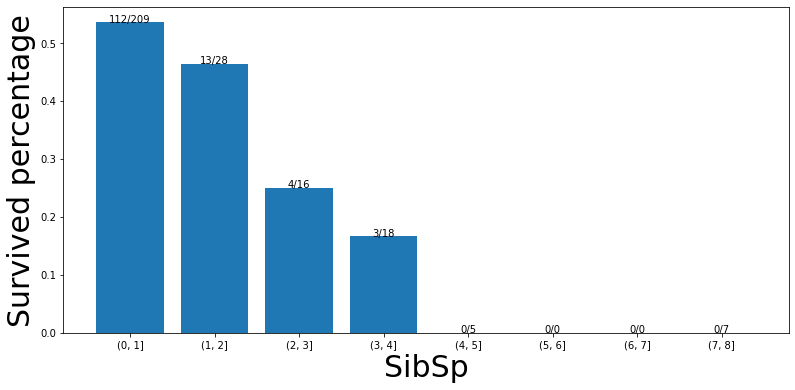

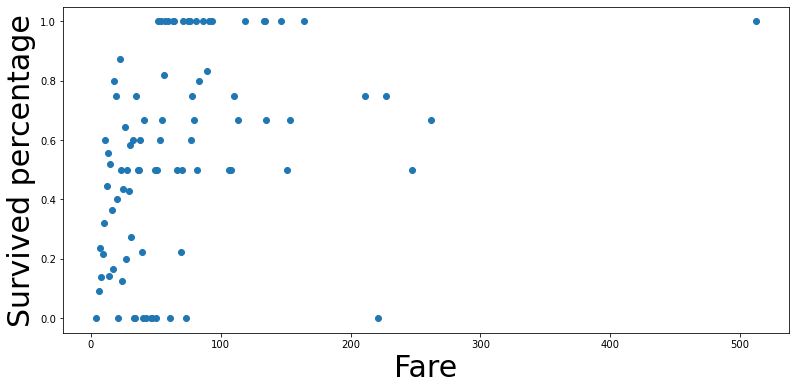

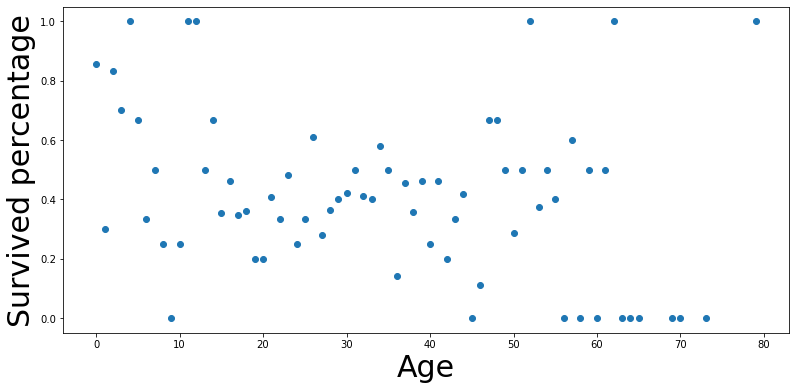

In [62]:
for feature_name, gap in [
    ('Pclass',1), 
    ('Fare',50),
    ('Parch',1), 
    ('Age',5),
    ('SibSp',1), 
]:
    Grouped = PlotFeatureGroups( 
        df_train_preparsed, feature_name, 'Survived', gap=gap, 
        figsize=(13,6), ylabel='Survived percentage' 
    )
for feature_name, gap in [
    ('Fare',1), 
    ('Age',1), 
]:
    Grouped = PlotFeatureGroups( 
        df_train_preparsed, feature_name, 'Survived', gap=gap, 
        plot=lambda x,y: plt.scatter(x,y), show_figures=False, 
        figsize=(13,6), ylabel='Survived percentage' 
    )
# Grouped = PlotFeatureGroups( 
#     df_train_preparsed, 'Fare', 'Survived', gap=1, 
#     plot=lambda x,y: plt.scatter(x,y), show_figures=False, 
#     figsize=(13,6), ylabel='Survived percentage' 
# )

## Feature engineering

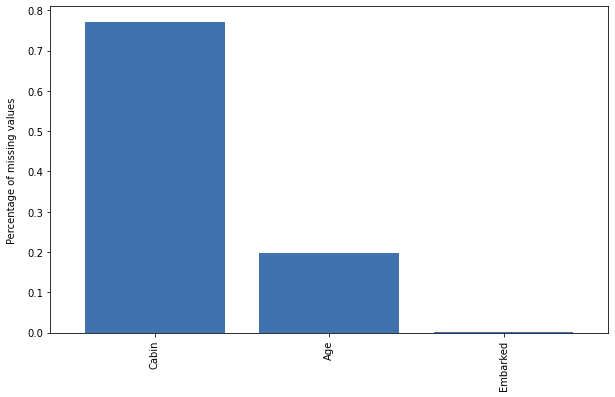

C:\Users\admin\Desktop\Canadian application\Jobs\Tensorflow\Titanic - Machine Learning from Disaster\utils\data_cleansing.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean = df.fillna(df.median())


In [51]:
# -- Replace NaN
%run "{cwd}\utils\data_cleansing.py"

PlotNaNs( df_train )
df_train_clean = ReplaceNaNs(df_train)